##  importing libraries

In [79]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### training image preprocessing


In [80]:
training_set=tf.keras.utils.image_dataset_from_directory(
   'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


## validation image processing


In [81]:
validation_set= tf.keras.utils.image_dataset_from_directory(
   'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [82]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [83]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break 

tf.Tensor(
[[[[183.5  177.5  181.5 ]
   [175.75 169.75 173.75]
   [177.75 171.75 175.75]
   ...
   [154.75 145.75 150.75]
   [152.   143.   148.  ]
   [143.75 134.75 139.75]]

  [[175.   169.   173.  ]
   [168.25 162.25 166.25]
   [179.75 173.75 177.75]
   ...
   [145.5  136.5  141.5 ]
   [144.   135.   140.  ]
   [146.25 137.25 142.25]]

  [[176.   170.   174.  ]
   [183.25 177.25 181.25]
   [178.   172.   176.  ]
   ...
   [154.25 145.25 150.25]
   [138.5  129.5  134.5 ]
   [174.75 165.75 170.75]]

  ...

  [[176.25 168.25 166.25]
   [173.75 165.75 163.75]
   [174.   166.   164.  ]
   ...
   [142.5  133.5  136.5 ]
   [129.   120.   123.  ]
   [135.25 126.25 129.25]]

  [[169.75 161.75 159.75]
   [177.   169.   167.  ]
   [171.   163.   161.  ]
   ...
   [140.5  131.5  134.5 ]
   [139.5  130.5  133.5 ]
   [139.5  130.5  133.5 ]]

  [[182.75 174.75 172.75]
   [178.   170.   168.  ]
   [176.25 168.25 166.25]
   ...
   [132.5  123.5  126.5 ]
   [140.75 131.75 134.75]
   [139.75 130.75 13

#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

### building model



In [86]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [87]:
model= tf.keras.models.Sequential()

## building convolution layer


In [88]:
from tensorflow.keras.layers import Input,Conv2D,MaxPool2D
model=Sequential()
model.add(Input(shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [89]:

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [90]:

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [91]:

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [92]:

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [93]:
model.add(Dropout(0.25))

In [94]:
model.add(Flatten())

In [95]:
model.add(Dense(units=1500,activation='relu'))

In [96]:
model.add(Dropout(0.4))

In [97]:
model.add(Dense(units=38,activation='softmax'))

### compiling model 

In [98]:
from tensorflow.keras import optimizers
optimizer=optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### model training


In [100]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1793s 815ms/step - accuracy: 0.3848 - loss: 2.1858 - val_accuracy: 0.8422 - val_loss: 0.4950
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1854s 844ms/step - accuracy: 0.8397 - loss: 0.5102 - val_accuracy: 0.8986 - val_loss: 0.3178
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1877s 854ms/step - accuracy: 0.9058 - loss: 0.2967 - val_accuracy: 0.9251 - val_loss: 0.2225
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1829s 833ms/step - accuracy: 0.9391 - loss: 0.1876 - val_accuracy: 0.9324 - val_loss: 0.2147
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1836s 836ms/step - accuracy: 0.9541 - loss: 0.1436 - val_accuracy: 0.9490 - val_loss: 0.1514
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1781s 811ms/step - accuracy: 0.9644 - loss: 0.1072 - val_accuracy: 0.9357 - val_loss: 0.2132
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1788s 814ms/step - accuracy: 0.9694 - loss: 0.0932 - val_accuracy: 0.9672 - val_loss: 0.1056
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1794s 817ms/s

## model evaluation


In [101]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 337s 153ms/step - accuracy: 0.9919 - loss: 0.0246
Training accuracy: 0.9926310777664185


In [102]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 84s 152ms/step - accuracy: 0.9713 - loss: 0.0953
Validation accuracy: 0.9707489013671875


## saving model 

In [119]:
model.save('trained_model.keras')

In [120]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5973682403564453,
  0.8648979067802429,
  0.917348325252533,
  0.943281888961792,
  0.9574934244155884,
  0.9668824076652527,
  0.9724162220954895,
  0.9779074192047119,
  0.9799985885620117,
  0.9828152656555176],
 'loss': [1.3687011003494263,
  0.42832762002944946,
  0.25962817668914795,
  0.1740151345729828,
  0.13107353448867798,
  0.10071250051259995,
  0.08502346277236938,
  0.06972362101078033,
  0.06250997632741928,
  0.05387904495000839],
 'val_accuracy': [0.8422490358352661,
  0.8986455798149109,
  0.925051212310791,
  0.9324493408203125,
  0.9490097761154175,
  0.9356931447982788,
  0.9671636819839478,
  0.9556680917739868,
  0.9635215401649475,
  0.9707489013671875],
 'val_loss': [0.4949806332588196,
  0.317826509475708,
  0.22246183454990387,
  0.21471858024597168,
  0.151354119181633,
  0.21318581700325012,
  0.10560210049152374,
  0.15327726304531097,
  0.12228727340698242,
  0.10110193490982056]}

In [121]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [122]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy visualization

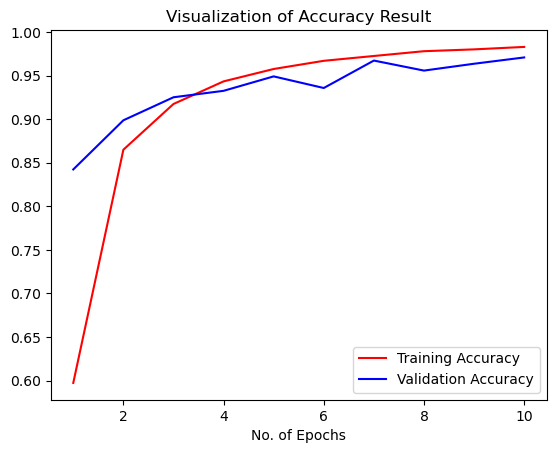

In [123]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## some other metrices for model evaluation

In [124]:
class_name = validation_set.class_names

In [125]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [126]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
y_pred,y_pred.shape

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 304s 17ms/step


(array([[9.99999881e-01, 2.17746567e-08, 7.20475679e-10, ...,
         2.73349433e-15, 4.84105011e-14, 4.16822262e-12],
        [9.99999762e-01, 1.41494301e-08, 4.18371622e-11, ...,
         3.98551829e-15, 1.50120761e-13, 1.20034484e-12],
        [1.00000000e+00, 1.42093795e-10, 3.83507462e-11, ...,
         8.12543005e-20, 1.14104682e-16, 1.90343225e-13],
        ...,
        [2.02166270e-11, 1.77346283e-13, 1.92645500e-11, ...,
         3.98633356e-14, 1.22470095e-13, 9.99999762e-01],
        [7.27110039e-10, 2.79721662e-11, 7.60796481e-10, ...,
         1.38959365e-11, 4.36149936e-11, 9.99999285e-01],
        [1.18085305e-10, 8.60742554e-12, 1.18466278e-11, ...,
         4.44862219e-13, 8.90058444e-11, 9.99997735e-01]], dtype=float32),
 (17572, 38))

In [128]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [129]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [130]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [131]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [132]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.97      0.98       504
                                 Apple___Black_rot       0.98      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.99      1.00      0.99       440
                                   Apple___healthy       0.97      0.98      0.98       502
                               Blueberry___healthy       0.99      0.99      0.99       454
          Cherry_(including_sour)___Powdery_mildew       0.99      1.00      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.97      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.93      0.

## confusion matrix visualization

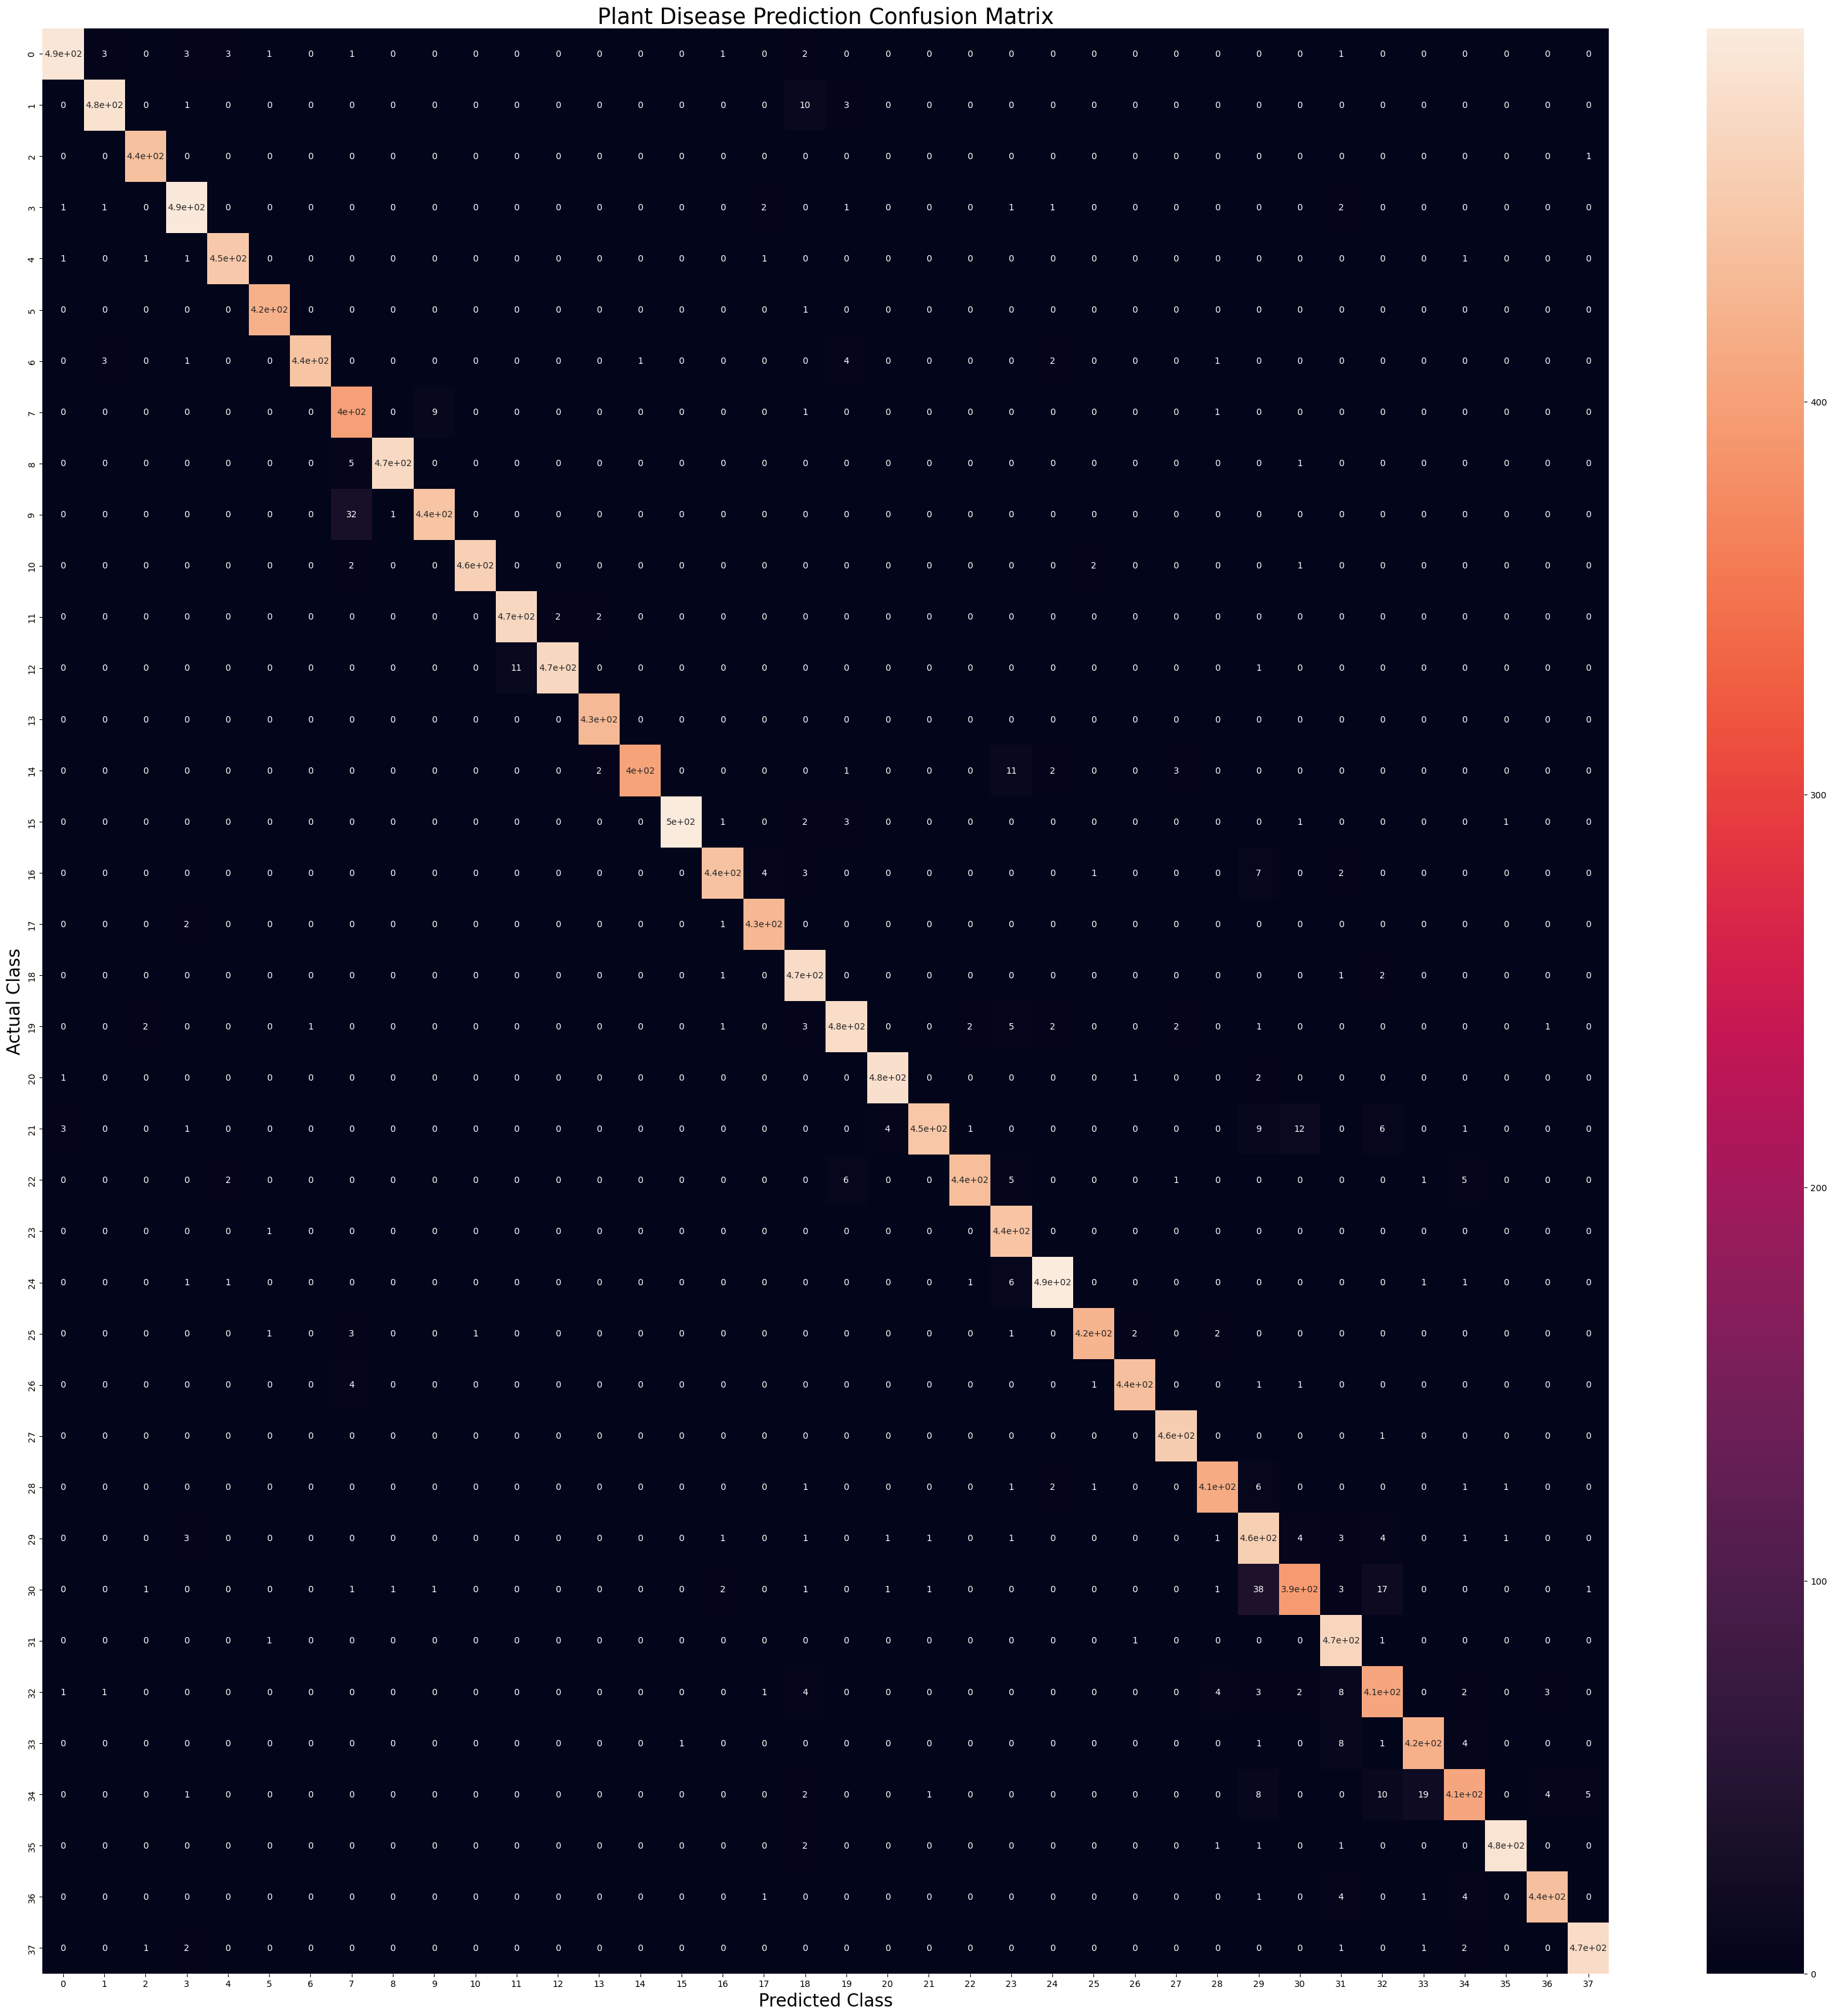

In [133]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()